## Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


## Load Dataset

In [15]:
df = pd.read_csv("plastic_waste.csv")

# Show dataset information
print(df.shape)
print(df.columns)
df.head()


(165, 6)
Index(['Country', 'Total_Plastic_Waste_MT', 'Main_Sources', 'Recycling_Rate',
       'Per_Capita_Waste_KG', 'Coastal_Waste_Risk'],
      dtype='object')


,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


## Data Preprocessing

In [16]:
# Clean column names (make them lowercase, replace spaces)
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

df.head()


,country,total_plastic_waste_mt,main_sources,recycling_rate,per_capita_waste_kg,coastal_waste_risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


## AI-Assisted parsing

In [17]:
def classify_source(text):
    text = str(text)
    if re.search(r"packaging", text, re.IGNORECASE):
        return "Packaging"
    elif re.search(r"consumer", text, re.IGNORECASE):
        return "Consumer Goods"
    elif re.search(r"automotive", text, re.IGNORECASE):
        return "Automotive"
    elif re.search(r"electronics", text, re.IGNORECASE):
        return "Electronics"
    else:
        return "Other"

df["detected_source"] = df["main_sources"].apply(classify_source)

df.head()


,country,total_plastic_waste_mt,main_sources,recycling_rate,per_capita_waste_kg,coastal_waste_risk,detected_source
0,China,59.08,Packaging_Industrial,29.8,41.2,High,Packaging
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium,Packaging
2,India,26.33,Consumer_Goods,11.5,19.3,High,Consumer Goods
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium,Packaging
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low,Packaging


## Data Visualization

C:\Users\Abc\AppData\Local\Temp\ipykernel_30828\643581088.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_plastic_waste_mt", y="country", data=top_countries, palette="Blues_r")


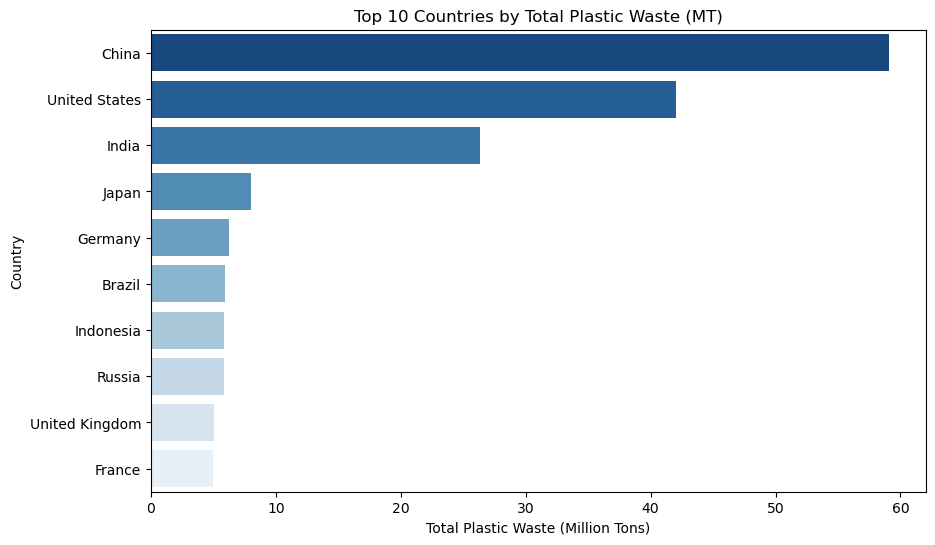

In [21]:
top_countries = df.sort_values(by="total_plastic_waste_mt", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="total_plastic_waste_mt", y="country", data=top_countries, palette="Blues_r")
plt.title("Top 10 Countries by Total Plastic Waste (MT)")
plt.xlabel("Total Plastic Waste (Million Tons)")
plt.ylabel("Country")
plt.show()


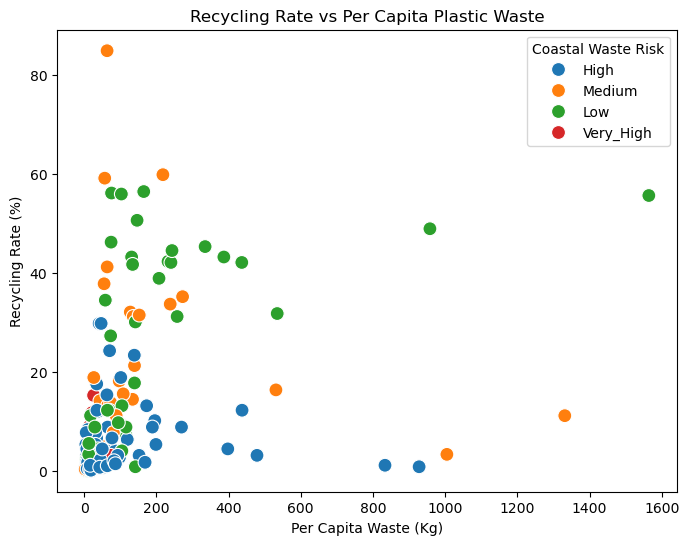

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="per_capita_waste_kg", y="recycling_rate", hue="coastal_waste_risk", data=df, s=100)
plt.title("Recycling Rate vs Per Capita Plastic Waste")
plt.xlabel("Per Capita Waste (Kg)")
plt.ylabel("Recycling Rate (%)")
plt.legend(title="Coastal Waste Risk")
plt.show()


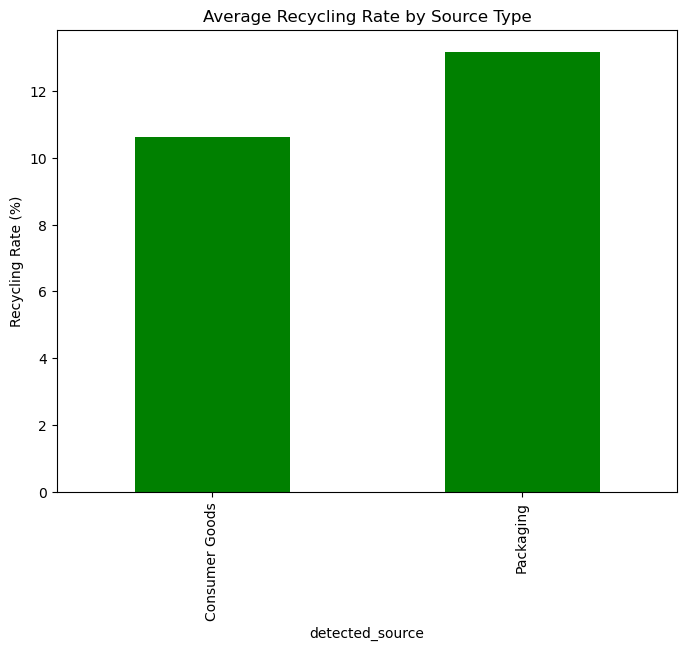

In [23]:
avg_recycling = df.groupby("detected_source")["recycling_rate"].mean().sort_values()

plt.figure(figsize=(8,6))
avg_recycling.plot(kind="bar", color="green")
plt.title("Average Recycling Rate by Source Type")
plt.ylabel("Recycling Rate (%)")
plt.show()


## Conclusion

✅ Used plastics dataset with columns (Country, Waste, Sources, Recycling, Per-Capita, Risk)  
✅ Cleaned and standardized column names  
✅ Added AI-assisted parsing for **source classification**  
✅ Analyzed & visualized:  
   - Top countries by waste  
   - Relationship between per-capita waste and recycling rates  
   - Recycling efficiency across different material sources  

This demonstrates the **data extraction, preprocessing, AI-assisted parsing, and analysis pipeline** 🚀
